<a href="https://colab.research.google.com/github/nikibhatt/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/NB_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv('googleplaystore.csv')
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Hypothesis: Number of installs for most popular(top 10) 'Teen' apps will far exceed the number of installs for most popular(top 10) 'non-Teen' apps

In [0]:
df_original = df

# Data cleaning for "Size" column
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)
# Data cleaning for "Installs" column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))
# Data cleaning for "Price" column
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())
# Row 10472 removed due to missing value of Category
df.drop(df.index[10472], inplace=True)
# Row [7312,8266] removed due to "Unrated" value in Content Rating
df.drop(df.index[[7312,8266]], inplace=True)

In [6]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [0]:
# Sort by "Category"
df.sort_values("Category", inplace = True)

In [8]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
df["Category NUM"] = lb_make.fit_transform(df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

In [0]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
# Rounding the mean value to 1 decimal place
df['Rating'].round(1)
df.dropna(axis=0, inplace=True)

In [0]:
# Change datatype
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

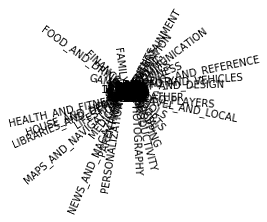

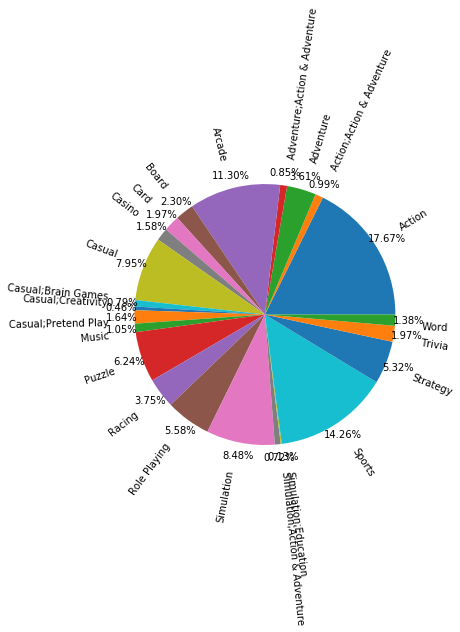

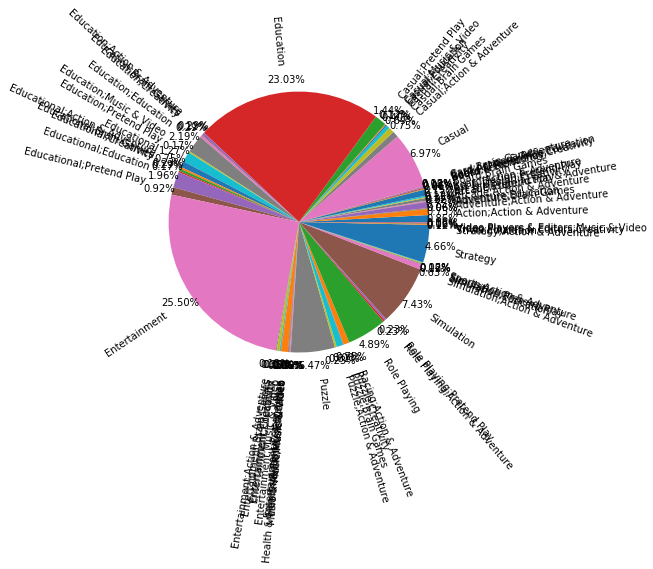

In [12]:
# Pie chart for Category
value_category = np.zeros(33)
labels_category = df['Category'].unique()
for i in range(len(df['Category'])):
 try:
  value = df['Category'][i]
  num = dict_category[value]
  value_category[num] = value_category[num] + 1
 except:
  pass
# Free and paid counts for each category
free_paid_list = [] 
# 1st value = Free 
# 2nd value = Paid 
### Alternate values
for j in labels_category:
 free_count = 0
 paid_count = 0
 for i in range(len(df['Type'])):
  try:
   if df['Category'][i] == j:
    if df['Type'][i] == "Free":
     free_count += 1
    if df['Type'][i] == "Paid":
     paid_count += 1
  except:
   pass   
 free_paid_list.append(free_count)
 free_paid_list.append(paid_count)
colors_free_paid = []
free_color = "#00ff00" # GREEN color
paid_color = "#0000ff" # BLUE color
for i in range(int(len(free_paid_list)/2)):
 colors_free_paid.append(free_color)
 colors_free_paid.append(paid_color)
plt.axis("equal")
plt.pie(value_category, labels=labels_category, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.pie(free_paid_list, colors=colors_free_paid, radius=1.25, autopct='%0.2f%%', pctdistance=1.0)
centre_circle = plt.Circle((0,0),1.0,color='black', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()
# Get possible values for GAME and FAMILY in Genres
list_games_genres = []
list_family_genres = []
for i in range(len(df['Category'])):
 try:
  if df['Category'][i] == 'GAME':
   value = df['Genres'][i]
   if value not in list_games_genres:
    list_games_genres.append(value)
  if df['Category'][i] == 'FAMILY':
   value = df['Genres'][i]
   if value not in list_family_genres:
    list_family_genres.append(value)  
 except:
  pass
value_games = np.zeros(len(list_games_genres))
labels_games = sorted(list_games_genres)
value_family = np.zeros(len(list_family_genres))
labels_family = sorted(list_family_genres)
# Dictionary for games:
dict_games = {}
for i in range(len(labels_games)):
 dict_games[labels_games[i]] = i
# Dictionary for family
dict_family = {}
for i in range(len(labels_family)):
 dict_family[labels_family[i]] = i
# Pie chart for GAME in Genres
for i in range(len(df['Genres'])):
 try:
  if df['Genres'][i] in labels_games:
   value = df['Genres'][i]
   num = dict_games[value]
   value_games[num] = value_games[num] + 1
 except:
  pass
plt.axis("equal")
plt.pie(value_games, labels=labels_games, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()
# Pie chart for FAMILY in Genres
for i in range(len(df['Category'])):
 try:
  if df['Genres'][i] in labels_family:
   value = df['Genres'][i]
   num = dict_family[value]
   value_family[num] = value_family[num] + 1
 except:
  pass
plt.axis("equal")
plt.pie(value_family, labels=labels_family, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()